In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

In [2]:
# Download the dataset
PATH_TO_DATA = r'C:\Users\yzh086\OneDrive - University of Bergen\hackthon_code\data\input_dataset-2.parquet'
data = pd.read_parquet(PATH_TO_DATA)
data.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,,,,,,
1970-12-19 09:51:44,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,operation,4.133996,1598.481390,1480.989917,...,1635.585700,1674.848803,175.758460,163.956613,146.288741,225.535170,297.780208,161.148100,NaN,NaN
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,operation,4.134078,1598.477449,1480.989528,...,1635.588478,1674.823883,175.755164,163.951680,146.284164,225.527142,297.771627,161.145094,NaN,NaN
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,operation,4.134731,1598.479316,1481.003188,...,1635.583464,1674.841318,175.764601,163.952007,146.283423,225.522291,297.777115,161.144487,NaN,NaN
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,operation,4.134270,1598.490184,1481.028827,...,1635.581384,1674.843245,175.763157,163.953924,146.283633,225.535827,297.772578,161.144037,NaN,NaN
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,operation,4.133583,1598.494073,1481.059017,...,1635.591746,1674.872300,175.760959,163.951968,146.286946,225.534231,297.774191,161.151967,NaN,NaN


In [3]:
# Download the dataset for predict
PATH_TO_PREDICT = r'C:\Users\yzh086\OneDrive - University of Bergen\hackthon_code\data\prediction_input.parquet'
data_predict = pd.read_parquet(PATH_TO_PREDICT)
data_predict.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode
timepoints,,,,,,,
1971-01-25 11:06:49,308.867868,5.592261,94.442351,158.159044,5279.876581,108.057467,operation
1971-01-25 11:06:50,308.898237,6.251969,94.445687,158.202829,5279.930843,108.057460,operation
1971-01-25 11:06:51,308.928605,7.037091,94.449024,158.246614,5279.985105,108.057454,operation
1971-01-25 11:06:52,308.958974,7.822213,94.452361,158.290399,5280.039368,108.057448,operation
1971-01-25 11:06:53,308.989343,8.607335,94.455698,158.302931,5280.058748,108.057442,operation


In [63]:
data_predict

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode
timepoints,,,,,,,
1971-01-25 11:06:49,308.867868,5.592261,94.442351,158.159044,5279.876581,108.057467,operation
1971-01-25 11:06:50,308.898237,6.251969,94.445687,158.202829,5279.930843,108.057460,operation
1971-01-25 11:06:51,308.928605,7.037091,94.449024,158.246614,5279.985105,108.057454,operation
1971-01-25 11:06:52,308.958974,7.822213,94.452361,158.290399,5280.039368,108.057448,operation
1971-01-25 11:06:53,308.989343,8.607335,94.455698,158.302931,5280.058748,108.057442,operation
...,...,...,...,...,...,...,...
1971-02-03 20:16:19,113.553752,-20.230184,44.871419,100.034072,5419.023758,106.746818,operation
1971-02-03 20:16:20,110.520494,-20.911359,43.954699,100.034548,5419.328873,106.734902,operation
1971-02-03 20:16:21,107.487618,-21.592784,43.037925,100.035024,5419.633988,106.722986,operation


In [4]:
data = data.replace({'operation':1,'start':0})

In [42]:
data['mode']

timepoints
1970-12-19 09:51:44    1
1970-12-19 09:51:45    1
1970-12-19 09:51:46    1
1970-12-19 09:51:47    1
1970-12-19 09:51:48    1
                      ..
1971-01-25 11:06:44    1
1971-01-25 11:06:45    1
1971-01-25 11:06:46    1
1971-01-25 11:06:47    1
1971-01-25 11:06:48    1
Name: mode, Length: 1874087, dtype: int64

In [5]:
!pip install pyarrow

!pip install fastparquet

     ---------------------------------------- 16.1/16.1 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 667.0/667.0 KB 1.4 MB/s eta 0:00:00
     -------------------------------------- 993.4/993.4 KB 4.2 MB/s eta 0:00:00


In [5]:
# split train and label data
data_train = data.drop(columns=['Bolt_1_Tensile','Bolt_2_Tensile','Bolt_3_Tensile','Bolt_4_Tensile'
                        ,'Bolt_5_Tensile','Bolt_6_Tensile'])

In [32]:
data_train

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,
1970-12-19 09:51:44,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,operation,4.133996,175.758460,163.956613,146.288741,225.535170,297.780208,161.148100,NaN,NaN
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,operation,4.134078,175.755164,163.951680,146.284164,225.527142,297.771627,161.145094,NaN,NaN
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,operation,4.134731,175.764601,163.952007,146.283423,225.522291,297.777115,161.144487,NaN,NaN
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,operation,4.134270,175.763157,163.953924,146.283633,225.535827,297.772578,161.144037,NaN,NaN
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,operation,4.133583,175.760959,163.951968,146.286946,225.534231,297.774191,161.151967,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971-01-25 11:06:44,308.716025,3.974309,94.425666,157.927905,5280.929965,108.057498,operation,4.193937,183.204777,178.082932,145.759475,225.351989,300.667011,160.949816,0.159366,0.491265
1971-01-25 11:06:45,308.746393,4.103262,94.429003,157.974925,5280.633358,108.057492,operation,4.193254,183.203293,178.082287,145.766584,225.348279,300.674243,160.947868,0.155962,0.497242
1971-01-25 11:06:46,308.776762,4.472929,94.432340,158.021945,5280.336751,108.057486,operation,4.193261,183.212397,178.081678,145.764007,225.354785,300.674078,160.947644,0.141150,0.501525


In [5]:
data_label = data.loc[:,['Bolt_1_Tensile','Bolt_2_Tensile','Bolt_3_Tensile','Bolt_4_Tensile'
                        ,'Bolt_5_Tensile','Bolt_6_Tensile']]

In [16]:
data_label

,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile
timepoints,,,,,,
1970-12-19 09:51:44,1598.481390,1480.989917,1684.247079,1601.359944,1635.585700,1674.848803
1970-12-19 09:51:45,1598.477449,1480.989528,1684.261611,1601.366508,1635.588478,1674.823883
1970-12-19 09:51:46,1598.479316,1481.003188,1684.270504,1601.374254,1635.583464,1674.841318
1970-12-19 09:51:47,1598.490184,1481.028827,1684.270683,1601.383179,1635.581384,1674.843245
1970-12-19 09:51:48,1598.494073,1481.059017,1684.271062,1601.378391,1635.591746,1674.872300
...,...,...,...,...,...,...
1971-01-25 11:06:44,1637.386115,1504.557822,1701.651420,1606.276545,1640.704071,1690.014705
1971-01-25 11:06:45,1637.365865,1504.546091,1701.654301,1606.271877,1640.711250,1690.017029
1971-01-25 11:06:46,1637.384133,1504.538696,1701.656143,1606.250028,1640.699142,1690.002008


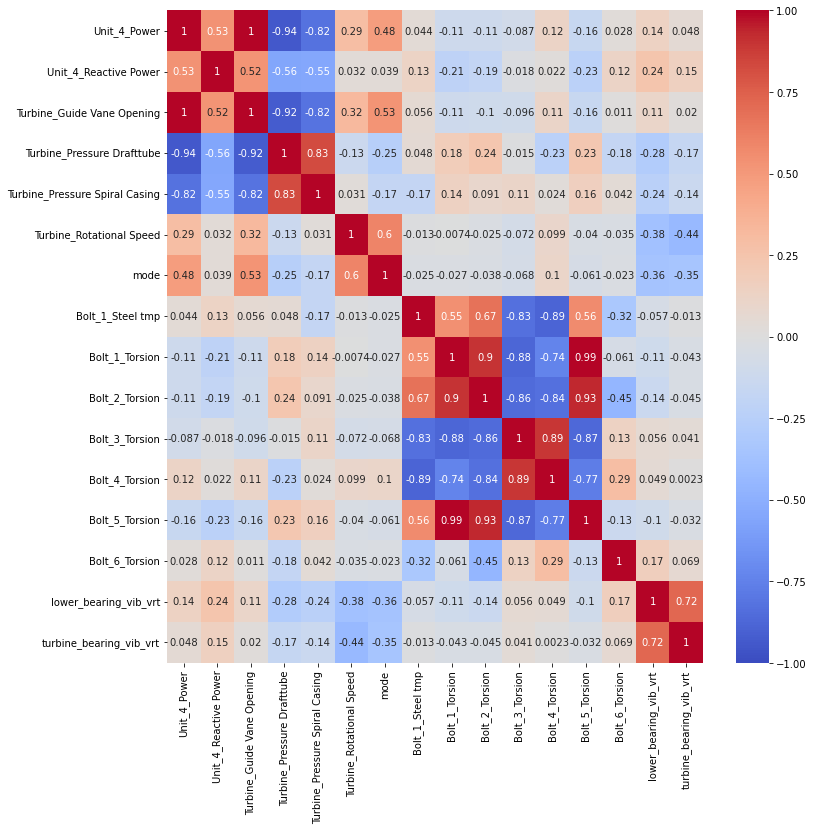

In [45]:
### statistics ###
##correlation matrix. Feature elimination based on multicollinearity -- remove the highly-correlated features
## for operational condition ##
corr=data_train.corr()
#mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmin=-1,cmap='coolwarm',annot=True);

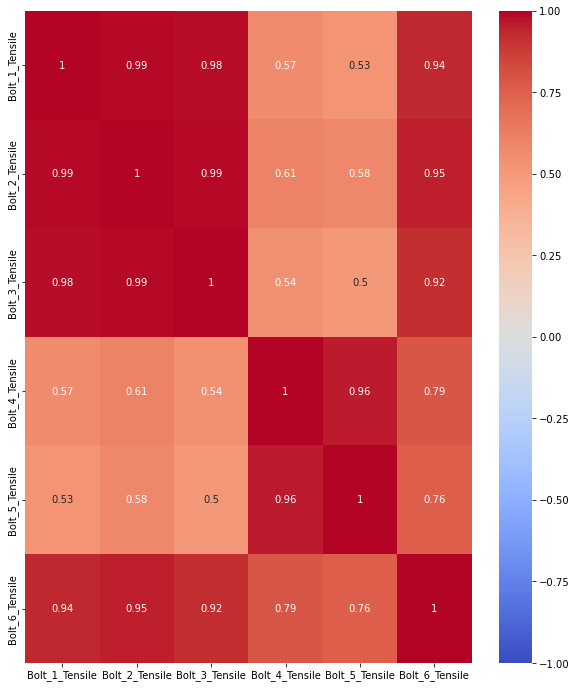

In [46]:
## for operational condition ##
corr_label=data_label.corr()
#mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(10,12))
sns.heatmap(corr_label,vmin=-1,cmap='coolwarm',annot=True);

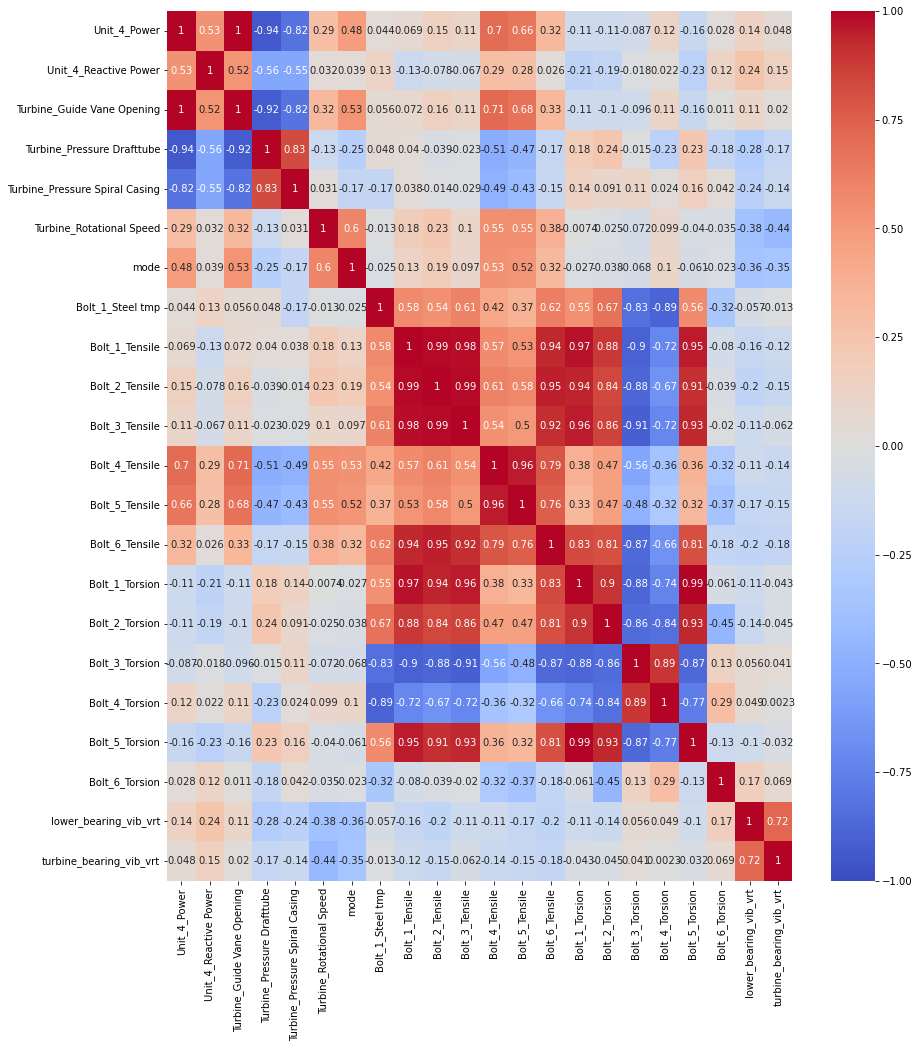

In [47]:
## for operational condition ##
corr_all=data.corr()
#mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(14,16))
sns.heatmap(corr_all,vmin=-1,cmap='coolwarm',annot=True);

In [54]:
corr_bolt1 = corr_all.loc[:,['Bolt_1_Tensile']]
corr_bolt2 = corr_all.loc[:,['Bolt_2_Tensile']]
corr_bolt3 = corr_all.loc[:,['Bolt_3_Tensile']]
corr_bolt4 = corr_all.loc[:,['Bolt_4_Tensile']]
corr_bolt5 = corr_all.loc[:,['Bolt_5_Tensile']]
corr_bolt6 = corr_all.loc[:,['Bolt_6_Tensile']]

In [69]:
corr_bolt6

,Bolt_6_Tensile
Unit_4_Power,0.321165
Unit_4_Reactive Power,0.025609
Turbine_Guide Vane Opening,0.330677
Turbine_Pressure Drafttube,-0.166593
Turbine_Pressure Spiral Casing,-0.150220
Turbine_Rotational Speed,0.379427
mode,0.320956
Bolt_1_Steel tmp,0.624714
Bolt_1_Tensile,0.935775
Bolt_2_Tensile,0.950813


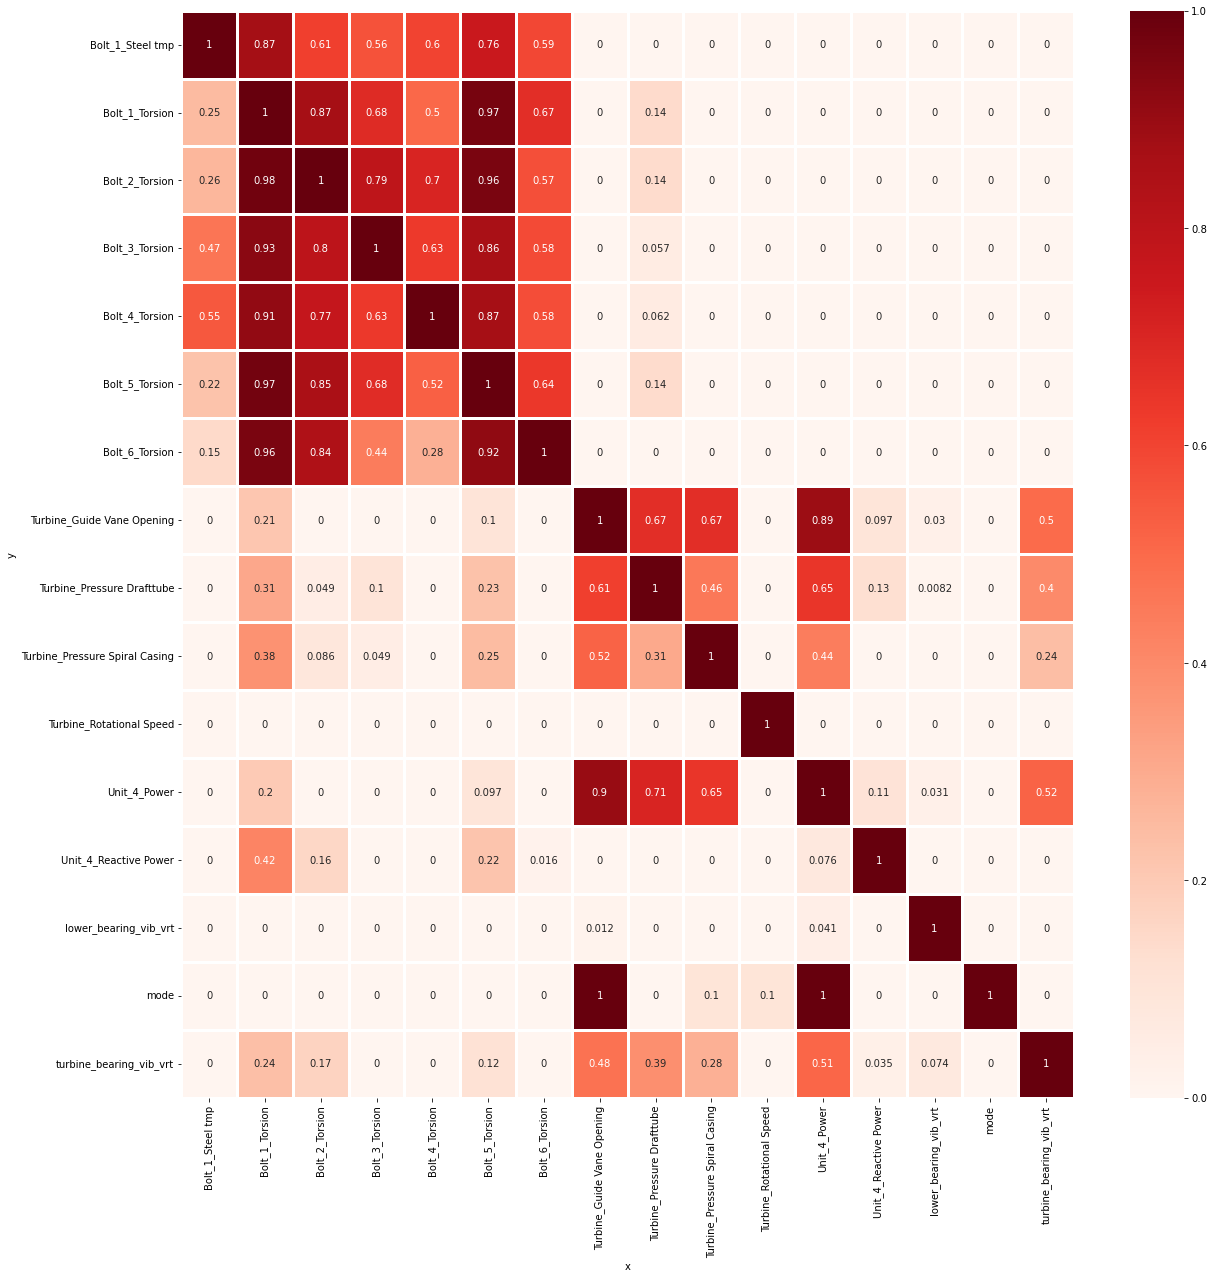

In [63]:
### way for feature elimination ###
### drop the highly correlated features ###
###pps scores detect all types of relationship present in between variables. But if only linear relationship is of interest pearson corr matrix should still be used
# !pip install ppscore
import ppscore as pps

######################################
fig, ax = plt.subplots(figsize=(20,20)) 
# sns.set(font_scale=1.3)
matrix_df = pps.matrix(data_train)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
g=sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Reds", linewidths=3, annot=True,ax=ax,annot_kws={"fontsize":10})

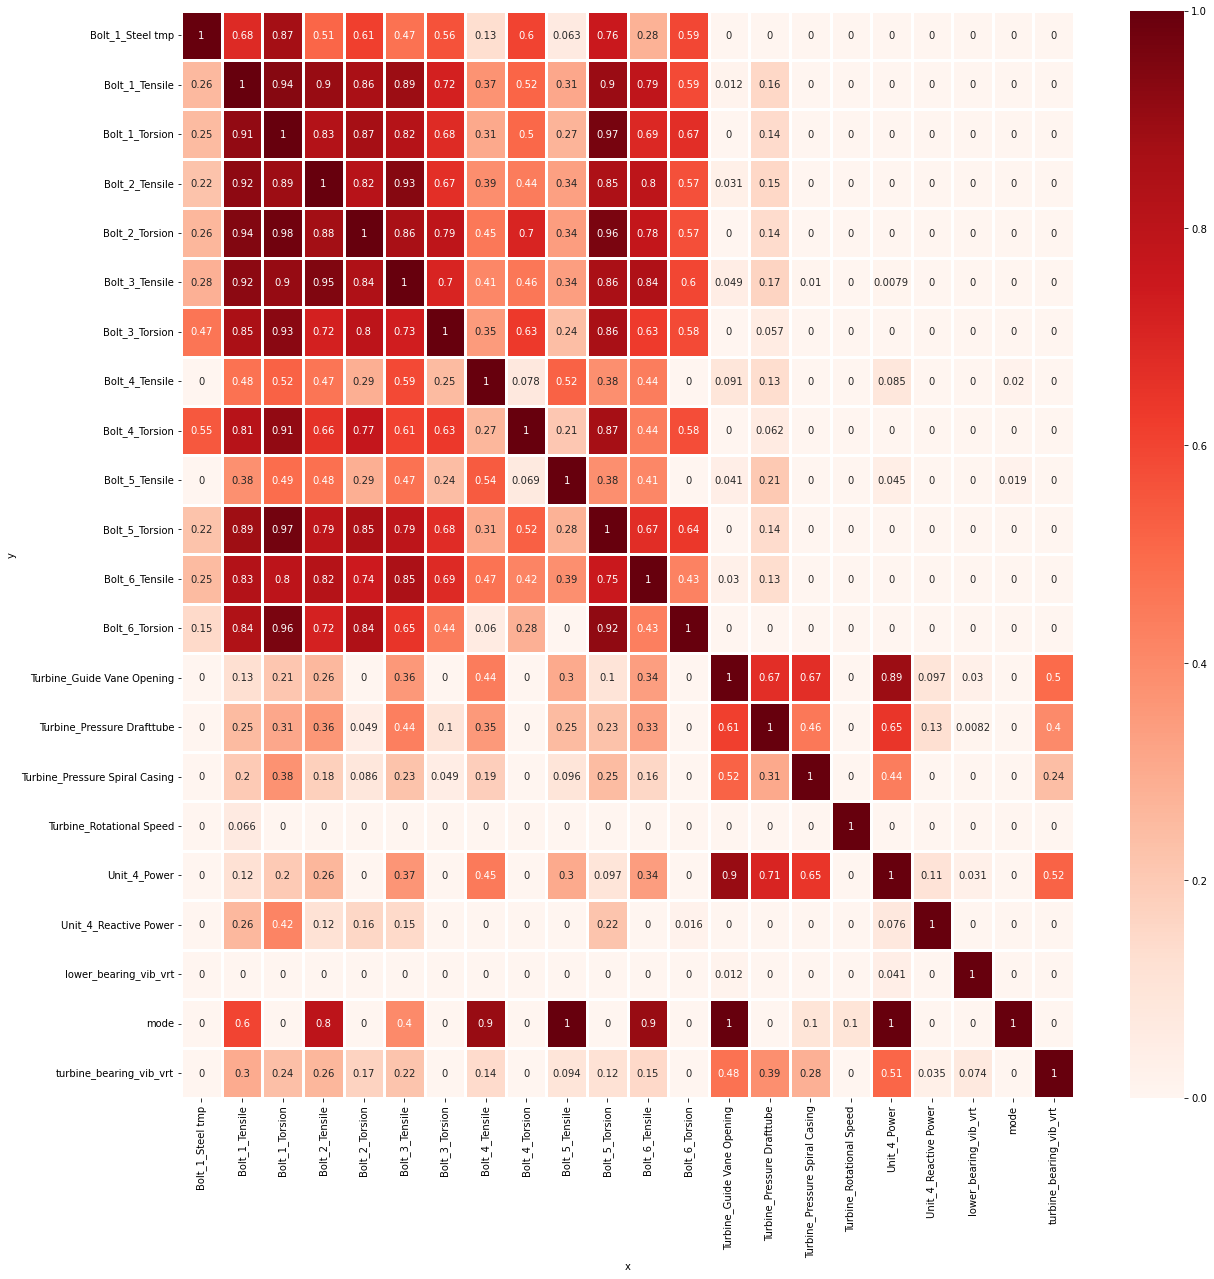

In [70]:
### way for feature elimination ###
### drop the highly correlated features ###
###pps scores detect all types of relationship present in between variables. But if only linear relationship is of interest pearson corr matrix should still be used
# !pip install ppscore
import ppscore as pps

######################################
fig, ax = plt.subplots(figsize=(20,20)) 
# sns.set(font_scale=1.3)
matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
g=sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Reds", linewidths=3, annot=True,ax=ax,annot_kws={"fontsize":10})

In [71]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Unit_4_Power,Unit_4_Power,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Unit_4_Power,Unit_4_Reactive Power,0.075754,regression,True,mean absolute error,6.201569,5.731774,DecisionTreeRegressor()
2,Unit_4_Power,Turbine_Guide Vane Opening,0.892640,regression,True,mean absolute error,3.429654,0.368209,DecisionTreeRegressor()
3,Unit_4_Power,Turbine_Pressure Drafttube,0.645183,regression,True,mean absolute error,9.208400,3.267295,DecisionTreeRegressor()
4,Unit_4_Power,Turbine_Pressure Spiral Casing,0.439013,regression,True,mean absolute error,17.033129,9.555364,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
479,turbine_bearing_vib_vrt,Bolt_4_Torsion,0.000000,regression,True,mean absolute error,0.166057,0.199281,DecisionTreeRegressor()
480,turbine_bearing_vib_vrt,Bolt_5_Torsion,0.000000,regression,True,mean absolute error,0.514854,0.629580,DecisionTreeRegressor()
481,turbine_bearing_vib_vrt,Bolt_6_Torsion,0.000000,regression,True,mean absolute error,0.272532,0.372777,DecisionTreeRegressor()
482,turbine_bearing_vib_vrt,lower_bearing_vib_vrt,0.000000,regression,True,mean absolute error,0.013499,0.014026,DecisionTreeRegressor()


In [ ]:
#we dropped proudct brand here despite being significant is because of its strong correlation with target consumer. As target consumer is a much smaller
#category column to handle without the curse of dimensionality we can reduce the load from one hot by removing product brand which has so many unique brands
#prep for catboost 
numerics = ['int64','int32','object']
df_train_cat= df_train.drop(['Product','Product_Brand','brand_key','Selling_Price'],axis=1).select_dtypes(include=numerics)

In [ ]:
# lagged features -- auto-correlation
data['lag_1'] = data['Count'].shift(1)
#data = data[['Datetime', 'lag_1', 'Count']]
data['lag_2'] = data['Count'].shift(2)
data['lag_3'] = data['Count'].shift(3)
data['lag_4'] = data['Count'].shift(4)
data['lag_5'] = data['Count'].shift(5)
data['lag_6'] = data['Count'].shift(6)
data['lag_7'] = data['Count'].shift(7)

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(data['Count'], lags=10)
plot_pacf(data['Count'], lags=10)

<AxesSubplot:xlabel='timepoints'>

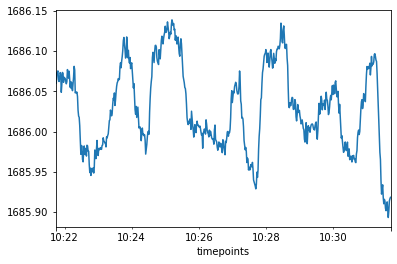

In [34]:
data['Bolt_3_Tensile'][1800:2400].plot()

In [35]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [52]:
crosscorr(data['Bolt_1_Tensile'], data['Bolt_5_Torsion'], lag=90)

0.9741409566116646

In [69]:
target = data['Bolt_4_Tensile']
for i in range(len(data_predict.columns)):
    lag30 = crosscorr(target, data[data_predict.columns[i]], lag=30)
    lag60 = crosscorr(target, data[data_predict.columns[i]], lag=60)
    lag90 = crosscorr(target, data[data_predict.columns[i]], lag=90)
    lag120 = crosscorr(target, data[data_predict.columns[i]], lag=120)
    lag150 = crosscorr(target,data[data_predict.columns[i]], lag=150)
    lag180 = crosscorr(target,data[data_predict.columns[i]], lag=180)
    print (data_predict.columns[i])
    print (lag30, lag60,lag90,lag120,lag150,lag180)

Unit_4_Power
0.6835574036096242 0.6638194208646676 0.638317867772605 0.612523954599935 0.5806662015005113 0.5475934318736085
Unit_4_Reactive Power
0.31155515333992034 0.32277094274827045 0.3229337050102098 0.3144574164676997 0.30656620066477835 0.2969504271005687
Turbine_Guide Vane Opening
0.6993596083441653 0.6744391876956548 0.6444611976049129 0.6178850542621981 0.5847119037925327 0.5502058729425198
Turbine_Pressure Drafttube
-0.5145455935242731 -0.5128902782285816 -0.5012788157645637 -0.4813827297677486 -0.4619806790807636 -0.44145970362359493
Turbine_Pressure Spiral Casing
-0.4988973965471601 -0.5168132925020311 -0.5479134991699417 -0.5323853013697804 -0.5121685365367886 -0.4909669351465636
Turbine_Rotational Speed
0.46969498233693496 0.31558091072941313 0.20918394663336054 0.19671193857732666 0.17303591800243742 0.13004817501170174
mode
0.4205585000812159 0.3054749417227993 0.22151221466854584 0.18915145051397064 0.1559243726159429 0.11735811833514609


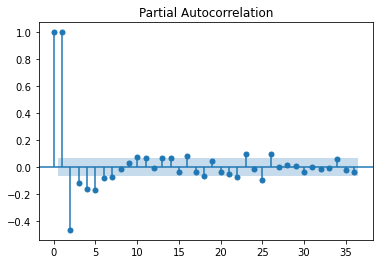

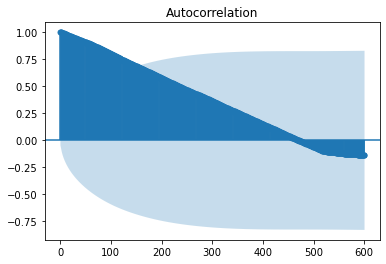

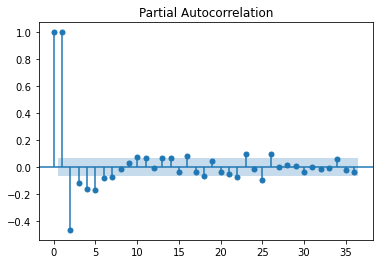

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(data_label['Bolt_1_Tensile'][:1800], lags=600)
plot_pacf(data_label['Bolt_1_Tensile'][:900], lags=36)

In [58]:
### rolling window statistics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [81]:
# Defining function to fit and evaluate models

from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def regr(Model, X_train, Y_train, X_test, Y_test):
    # Random forest 
    if Model=='rf':
    # define the model

        model = RandomForestRegressor()
        model.fit(X_train, Y_train.values.ravel()) 
        Y_fit = model.predict(X_train)
        Y_pred = model.predict(X_test)
        plt.scatter(Y_fit,Y_train)
        plt.scatter(Y_pred,Y_test)
        
        return model, Y_pred
        
    if Model == 'GDB':
        model = GradientBoostingRegressor(random_state=0)
        model.fit(X_train, Y_train)
        Y_fit = model.predict(X_train)
        Y_pred = model.predict(X_test)
        print('GradientBoostingRegressor accuracy: {}'.format(model.score(X_train,Y_train)))
        #print(f'The accuracy score: {accuracy_score(Y_test, Y_pred)}')
        #print(f'The F1 Score is: {f1_score(Y_test, Y_pred)}')
        plt.scatter(Y_fit,Y_train)
        plt.scatter(Y_pred,Y_test)
        return model, Y_pred

    # Linear regression
    if Model == 'mlr':
        # define the model
        model = LinearRegression().fit(X_train, Y_train)
        print(model.score(X_train,Y_train))
        Y_fit = model.predict(X_train)
        Y_pred = model.predict(X_test)
        plt.scatter(Y_fit,Y_train)
        plt.scatter(Y_pred,Y_test)
        return model, Y_pred

    # Neural Network
    if Model == 'ANN':
        model = Sequential()
        model.add(Dense(32, input_dim=1, kernel_initializer='normal', activation='relu'))
        model.add(Dense(16, kernel_initializer='normal'))
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='adam')

        # fit the keras model on the dataset
        model.fit(X_train, Y_train, epochs=150, batch_size=10)
        Y_fit = model.predict(X_train)
        Y_pred = model.predict(X_test)
        return model, Y_pred

    # Rating Curve
    if Model == 'rc':
        params, _ = curve_fit(rc,X_train['Water Level'],Y_train)
        par1, par2, par3 = params

        Y_fit = rc(X_train['Water Level'],par1,par2,par3)
        Y_pred = rc(X_test['Water Level'],par1, par2, par3)

        print(params)

    print('MAPE train ' + str(mean_squared_error(Y_train, Y_fit)))
    print('MAPE test ' + str(mean_squared_error(Y_test, Y_pred)))
    print('MAPE train ' + str(mean_absolute_percentage_error(Y_train, Y_fit)))
    print('MAPE test ' + str(mean_absolute_percentage_error(Y_test, Y_pred)))

In [94]:
## model for bolt4 ##
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

cols = data_predict.columns
cols = cols.to_list()
mys = 'Bolt_4_Tensile'
cols.append(mys)

#data = data.replace({'operation':1,'start':0})

df = data[cols]
df.dropna(inplace=True)

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X = df.loc[:, df.columns != 'Bolt_4_Tensile']
Y = df.loc[:, df.columns == 'Bolt_4_Tensile']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,      
                                                                            test_size=.05, 
                                                                            shuffle=True, 
                                                                            random_state=seed)
# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for testing :   ", N_test)

X_train = reduce_mem_usage(X_train, verbose=True)

X_test = reduce_mem_usage(X_test, verbose=True)

Y_train = reduce_mem_usage(Y_train, verbose=True)

Y_test = reduce_mem_usage(Y_test, verbose=True)

X = reduce_mem_usage(X, verbose=True)

Y = reduce_mem_usage(Y, verbose=True)

l_bolt4, pred_bolt4 = regr('rf', X_train[:300000], Y_train[:300000], X_test[:15000], Y_test[:15000])

import pickle
filename = 'l_bolt4.plk'
pickle.dump(l_bolt4, open(filename, 'wb'))

C:\Users\yzh086\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Datapoints used for training:    1662500
Datapoints used for testing :    87500


C:\Users\yzh086\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Datapoints used for training:    1662500
Datapoints used for testing :    87500
Mem. usage decreased to 33.30 Mb (67.2% reduction)


C:\Users\yzh086\AppData\Local\Temp/ipykernel_11620/1732537454.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_11620/1732537454.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int8)


Mem. usage decreased to  1.75 Mb (67.2% reduction)
Mem. usage decreased to 15.85 Mb (37.5% reduction)
Mem. usage decreased to  0.83 Mb (37.5% reduction)
Mem. usage decreased to 35.05 Mb (67.2% reduction)
Mem. usage decreased to 16.69 Mb (37.5% reduction)


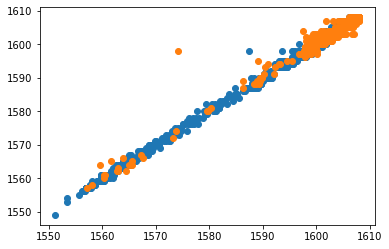

In [98]:
## model for bolt5 ##
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

cols = data_predict.columns
cols = cols.to_list()
mys = 'Bolt_4_Tensile'
cols.append(mys)

#data = data.replace({'operation':1,'start':0})

df = data[cols]
df.dropna(inplace=True)

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X = df.loc[:, df.columns != 'Bolt_4_Tensile']
Y = df.loc[:, df.columns == 'Bolt_4_Tensile']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,      
                                                                            test_size=.05, 
                                                                            shuffle=True, 
                                                                            random_state=seed)
# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for testing :   ", N_test)

X_train = reduce_mem_usage(X_train, verbose=True)

X_test = reduce_mem_usage(X_test, verbose=True)

Y_train = reduce_mem_usage(Y_train, verbose=True)

Y_test = reduce_mem_usage(Y_test, verbose=True)

X = reduce_mem_usage(X, verbose=True)

Y = reduce_mem_usage(Y, verbose=True)

l_bolt5, pred_bolt5 = regr('rf', X_train[:300000], Y_train[:300000], X_test[:15000], Y_test[:15000])

import pickle
filename = 'l_bolt5.plk'
pickle.dump(l_bolt5, open(filename, 'wb'))

In [82]:
### 2nd step model: from bolt 4 and 5 to bolt 1,2,3,6 tensile
### 4,5 to bolt 1/2/3/6 ### for Bolt 1
cols = ['Bolt_4_Tensile', 'Bolt_5_Tensile']

mys = 'Bolt_1_Tensile'
cols.append(mys)

#data = data.replace({'operation':1,'start':0})

df = data[cols]
df.dropna(inplace=True)

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X = df.loc[:, df.columns != 'Bolt_1_Tensile']
Y = df.loc[:, df.columns == 'Bolt_1_Tensile']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,      
                                                                            test_size=.05, 
                                                                            shuffle=True, 
                                                                            random_state=seed)
# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for testing :   ", N_test)


X_train = reduce_mem_usage(X_train, verbose=True)

X_test = reduce_mem_usage(X_test, verbose=True)

Y_train = reduce_mem_usage(Y_train, verbose=True)

Y_test = reduce_mem_usage(Y_test, verbose=True)

X = reduce_mem_usage(X, verbose=True)

Y = reduce_mem_usage(Y, verbose=True)

l_bolt1, pred_bolt1 = regr('rf', X_train[:300000], Y_train[:300000], X_test[:15000], Y_test[:15000])

import pickle
filename = 'l_bolt1.plk'
pickle.dump(l_bolt1, open(filename, 'wb'))

C:\Users\yzh086\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Datapoints used for training:    1662500
Datapoints used for testing :    87500


In [74]:
# reduce the memory for a large dataset used
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    #objecttype=['object']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #if col_type in objecttype:
            #df[col]=df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [103]:
### 2nd step model: from bolt 4 and 5 to bolt 1,2,3,6 tensile
### 4,5 to bolt 1/2/3/6 ### for Bolt2
cols = ['Bolt_4_Tensile', 'Bolt_5_Tensile']

mys = 'Bolt_2_Tensile'
cols.append(mys)

#data = data.replace({'operation':1,'start':0})

df = data[cols]
df.dropna(inplace=True)

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X = df.loc[:, df.columns != 'Bolt_2_Tensile']
Y = df.loc[:, df.columns == 'Bolt_2_Tensile']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,      
                                                                            test_size=.05, 
                                                                            shuffle=True, 
                                                                            random_state=seed)
# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for testing :   ", N_test)

X_train = reduce_mem_usage(X_train, verbose=True)

X_test = reduce_mem_usage(X_test, verbose=True)

Y_train = reduce_mem_usage(Y_train, verbose=True)

Y_test = reduce_mem_usage(Y_test, verbose=True)

X = reduce_mem_usage(X, verbose=True)

Y = reduce_mem_usage(Y, verbose=True)

l_bolt2, pred_bolt2 = regr('rf', X_train[:300000], Y_train[:300000], X_test[:15000], Y_test[:15000])

import pickle
filename = 'l_bolt2.plk'
pickle.dump(l_bolt2, open(filename, 'wb'))

C:\Users\yzh086\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Datapoints used for training:    1662500
Datapoints used for testing :    87500
Mem. usage decreased to 19.03 Mb (50.0% reduction)
Mem. usage decreased to  1.00 Mb (50.0% reduction)
Mem. usage decreased to 15.85 Mb (37.5% reduction)
Mem. usage decreased to  0.83 Mb (37.5% reduction)
Mem. usage decreased to 20.03 Mb (50.0% reduction)
Mem. usage decreased to 16.69 Mb (37.5% reduction)


C:\Users\yzh086\AppData\Local\Temp/ipykernel_11620/1732537454.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)


C:\Users\yzh086\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Datapoints used for training:    1662500
Datapoints used for testing :    87500
Mem. usage decreased to 19.03 Mb (50.0% reduction)
Mem. usage decreased to  1.00 Mb (50.0% reduction)
Mem. usage decreased to 15.85 Mb (37.5% reduction)
Mem. usage decreased to  0.83 Mb (37.5% reduction)
Mem. usage decreased to 20.03 Mb (50.0% reduction)
Mem. usage decreased to 16.69 Mb (37.5% reduction)


C:\Users\yzh086\AppData\Local\Temp/ipykernel_11620/1732537454.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)


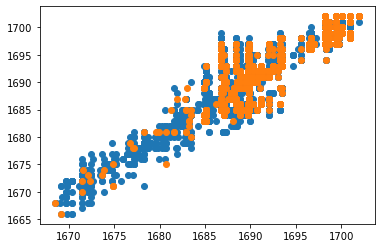

In [86]:
### 2nd step model: from bolt 4 and 5 to bolt 1,2,3,6 tensile
### 4,5 to bolt 1/2/3/6 ### for Bolt 3
cols = ['Bolt_4_Tensile', 'Bolt_5_Tensile']

mys = 'Bolt_3_Tensile'
cols.append(mys)

#data = data.replace({'operation':1,'start':0})

df = data[cols]
df.dropna(inplace=True)

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X = df.loc[:, df.columns != 'Bolt_3_Tensile']
Y = df.loc[:, df.columns == 'Bolt_3_Tensile']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,      
                                                                            test_size=.05, 
                                                                            shuffle=True, 
                                                                            random_state=seed)
# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for testing :   ", N_test)

X_train = reduce_mem_usage(X_train, verbose=True)

X_test = reduce_mem_usage(X_test, verbose=True)

Y_train = reduce_mem_usage(Y_train, verbose=True)

Y_test = reduce_mem_usage(Y_test, verbose=True)

X = reduce_mem_usage(X, verbose=True)

Y = reduce_mem_usage(Y, verbose=True)


l_bolt3, pred_bolt3 = regr('rf', X_train[:300000], Y_train[:300000], X_test[:15000], Y_test[:15000])

import pickle
filename = 'l_bolt3.plk'
pickle.dump(l_bolt3, open(filename, 'wb'))

C:\Users\yzh086\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Datapoints used for training:    1662500
Datapoints used for testing :    87500
Mem. usage decreased to 19.03 Mb (50.0% reduction)
Mem. usage decreased to  1.00 Mb (50.0% reduction)
Mem. usage decreased to 15.85 Mb (37.5% reduction)
Mem. usage decreased to  0.83 Mb (37.5% reduction)
Mem. usage decreased to 20.03 Mb (50.0% reduction)
Mem. usage decreased to 16.69 Mb (37.5% reduction)


C:\Users\yzh086\AppData\Local\Temp/ipykernel_11620/1732537454.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)


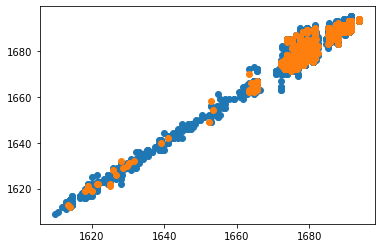

In [87]:
### 2nd step model: from bolt 4 and 5 to bolt 1,2,3,6 tensile
### 4,5 to bolt 1/2/3/6 ### for Bolt 6
cols = ['Bolt_4_Tensile', 'Bolt_5_Tensile']

mys = 'Bolt_6_Tensile'
cols.append(mys)

#data = data.replace({'operation':1,'start':0})

df = data[cols]
df.dropna(inplace=True)

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X = df.loc[:, df.columns != 'Bolt_6_Tensile']
Y = df.loc[:, df.columns == 'Bolt_6_Tensile']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,      
                                                                            test_size=.05, 
                                                                            shuffle=True, 
                                                                            random_state=seed)
# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for testing :   ", N_test)

X_train = reduce_mem_usage(X_train, verbose=True)

X_test = reduce_mem_usage(X_test, verbose=True)

Y_train = reduce_mem_usage(Y_train, verbose=True)

Y_test = reduce_mem_usage(Y_test, verbose=True)

X = reduce_mem_usage(X, verbose=True)

Y = reduce_mem_usage(Y, verbose=True)


l_bolt6, pred_bolt6 = regr('rf', X_train[:300000], Y_train[:300000], X_test[:15000], Y_test[:15000])

import pickle
filename = 'l_bolt6.plk'
pickle.dump(l_bolt6, open(filename, 'wb'))